In [76]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

# Data Preprocessing

## In this section we are building the directory and using CV2 library to iterate over all the images and load it into out python file

In [77]:
DATADIR='C:/Users/PSEN/Desktop/Capstone project/project'
CATEGORIES=['25','50','100']

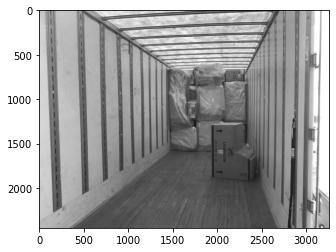

In [78]:
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [79]:
img_array

array([[194, 195, 196, ..., 255, 255, 255],
       [192, 193, 194, ..., 255, 255, 255],
       [196, 197, 198, ..., 255, 255, 255],
       ...,
       [180, 179, 178, ..., 167, 162, 155],
       [180, 179, 177, ..., 170, 165, 158],
       [180, 179, 177, ..., 169, 164, 157]], dtype=uint8)

In [62]:
print(img_array.shape)

(2448, 3264)


## Converting the images into grayscle and cretaing the training set 

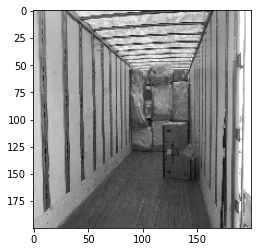

In [63]:
IMG_SIZE=200

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [64]:
training_data=[]

def create_taining_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])

            

create_taining_data()   

In [65]:
print(len(training_data))

60


## Shuffelling the images and creating x and y variable and saving the data in pickle file

In [66]:
import random

random.shuffle(training_data)

In [67]:
X=[]
y=[]


for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y=np.array(y)

In [68]:
import pickle

pickle_out=open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()


pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [69]:
pickle_in=open('X.pickle','rb')
X=pickle.load(pickle_in)

# Building Network

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

In [104]:
Name='CNN-1-{}'.format(int(time.time()))
tensorboard=TensorBoard(log_dir='logs/{}'.format(Name))

In [71]:
X=pickle.load(open('X.pickle','rb'))
y=pickle.load(open('y.pickle','rb'))

X=X/255.0

In [105]:
model=Sequential()


model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='softmax'))
#model.add(Activation('softmax'))
          
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
          
model.fit(X,y,batch_size=32,epochs=5,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/5
2/2 [==============================] - 3s 2s/step - loss: 0.0000e+00 - accuracy: 0.2917 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 2s 815ms/step - loss: 0.0000e+00 - accuracy: 0.2917 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 2s 864ms/step - loss: 0.0000e+00 - accuracy: 0.2917 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/5
2/2 [==============================] - 2s 833ms/step - loss: 0.0000e+00 - accuracy: 0.2917 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/5
2/2 [==============================] - 2s 818ms/step - loss: 0.0000e+00 - accuracy: 0.2917 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
